# DecisionTreeClassifier - using make_moons dataset

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 17 10:12:30 2022
@credits: https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb
"""
# Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)


import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import the DecisionTreeClassifier from sklearn.tree & GridSearchCV from sklearn.model_selection.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [2]:
# Loading/viewing the dataset to see shape etc.

data = make_moons() 
dataset = pd.DataFrame(data[0])
dataset

,0,1
0,0.002055,0.435930
1,0.991790,0.127877
2,0.801414,0.598111
3,-0.801414,0.598111
4,1.672301,-0.240278
...,...,...
95,1.032052,-0.499486
96,2.000000,0.500000
97,0.018441,0.308841
98,0.000000,0.500000


In [5]:
# Split it into a training set and a test set using train_test_split().

from sklearn.model_selection import train_test_split

# Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
# Here we'll also split the dataset into a training set and a test set using train_test_split().

X, y = make_moons(n_samples=10000, noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
# Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a 
# DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_



Fitting 3 folds for each of 294 candidates, totalling 882 fits


DecisionTreeClassifier(max_leaf_nodes=14, random_state=42)

In [160]:
# Now lets import metrics to predict accuracy of our model.
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [161]:
from sklearn.tree import export_text

# Train the model
model = DecisionTreeClassifier().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)


DecisionTreeClassifier() 

|--- feature_1 <= 0.30
|   |--- feature_0 <= -0.48
|   |   |--- feature_0 <= -0.76
|   |   |   |--- feature_0 <= -0.84
|   |   |   |   |--- feature_0 <= -0.90
|   |   |   |   |   |--- feature_1 <= -0.07
|   |   |   |   |   |   |--- feature_1 <= -0.07
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  -0.07
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.90
|   |   |   |   |   |--- feature_0 <= -0.90
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -0.90
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.84
|   |   |   |   |--- feature_0 <= -0.84
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.84
|   |   |   |   |   |--- feature_0 <= -0.83
|   |   |   |   |   |   |--- feature_0 <= -0.83
|   |   |   |   |   |   |   |--- feature_1 <= -0.18
|   |   | 

In [165]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# rmse = np.sqrt(mse)
# print("RMSE:", rmse)

# r2 = r2_score(y_test, predictions)
# print("R2:", r2)


MSE: 0.185


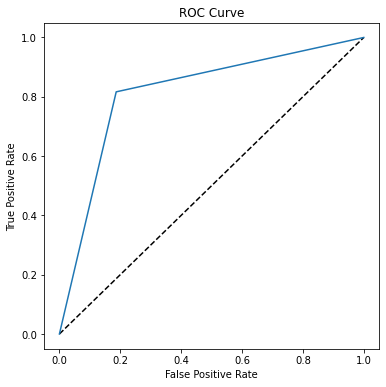

In [176]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline


# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions [:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')

# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The ROC chart above shows the curve of the true and false positive rates for different threshold values between 0 and 1.
 
A perfect classifier would have a curve that goes straight up the left side and straight across the top. 

The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction;
 
Obviously we want the curve to be higher than that (or our model is just simply guessing!).

In [147]:
# The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. 
# The closer to 1 this value is, the better the model, implement scikit-Learn function to calculate this metric.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores)
print('AUC: ' + str(auc))

AUC: 0.7964086735036959


In [180]:
# Now lets predict overall precision and recall values for our model.

from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))


Overall Precision: 0.8100502512562814
Overall Recall: 0.8166160081053698
